# Joey Tamondong

# Open Data Example #1: City of Chicago Salaries

*Source for Data Set:* City of Chicago Department of Human Resources

*URL for Data Set:* https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w

*Description of Data Set:* "This dataset is a listing of all current City of Chicago employees, complete with full names, departments, positions, and annual salaries. For hourly employees the annual salary is estimated." (Description written by City of Chicago) 

*File Format for Data Set:* CSV file (Comma Separated Values)

*Age of Data Set:* Last updated January 21, 2021

### Import CSV File

In [2]:
# Import pandas module
import pandas as pd 
# Read in the csv file (comma separated values)
salary_DF = pd.read_csv("Salaries_2022.csv")

# Print the last three entries of the file
    # The last line of a cell will print automatically!
    # Can sometimes display data differently
salary_DF[-3:]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
31098,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,102372.0,NaN
31099,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN
31100,"ZYSKOWSKI, DARIUSZ",CHIEF DATA BASE ANALYST,DAIS,F,Salary,NaN,142176.0,NaN


Sometimes, the last entry (or the last few entries) in a dataset may be erroneous. Use code similar to below to eliminate them.

    salary_DF = salary_DF.drop(salary_DF.index[-1])

*Note: This doesn't appear to be a problem with the 2022 version of this dataset, so you are unlikely to need to run the above code*

In [3]:
# Use this cell to run the code above (if needed)
salary_DF = salary_DF.drop(salary_DF.index[-1])
# Note: Only run this code if your teacher says you need it

### Question: How many employees are paid by the City of Chicago?

In [4]:
# Print the length of the data frame
len(salary_DF)

31100

**Your Answer:** *There are 31100 employees paid by the city of Chicago.*

### Modify Data: Create a List of Salaries

In [5]:
# Store all values from the "Annual Salary" column
salary_list = salary_DF["Annual Salary"]
# Print the first 3 entries
salary_list[:3]

0    122568.0
1    110796.0
2    122112.0
Name: Annual Salary, dtype: float64

### Modify Data to be Usable

Step 0: If you have data with dollar signs, we would need to delete these symbols. This year's spreadsheet doesn't have any dollar signs, so we don't need to worry about this. But in previous years, we had to replace dollar signs with empty strings. In your own data projects, you'll want to check if this step is necessary. 

Step 1: Clean data by deleting dollar signs, '$', from the salaries and replace any empty strings with a salary of '0.00' dollars per year.

Step 2: Create a list with only salaries, converted from strings to floating point numbers. For example, the string '84450.0' becomes the floating point number 84450.0.

In [6]:
# This can delete '$' symbols if present before salaries
# salary_list = salary_list.str.replace("$","")

# Convert to floating point number
    # Empty cells --> 0.00
salary_list = salary_list.astype(float)
# Print the last 4 entries
salary_list[-4:]

31096     90990.0
31097     95586.0
31098    102372.0
31099    109236.0
Name: Annual Salary, dtype: float64

It might come in handy later to have our salaries as floating point numbers. Let's replace the old column in our dataframe (string data) and replace it with our new one (floating point numbers):

In [7]:
# Delete the ORIGINAL data in "Annual Salary" column
del salary_DF["Annual Salary"]
# Replace with our NEW data
salary_DF["Annual Salary"] = salary_list
# Print first 10 entries
salary_DF[:10]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,NaN,122568.0
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,NaN,110796.0
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,NaN,122112.0
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,45.9,NaN
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,NaN,86730.0
5,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,51.0,NaN
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,NaN,118830.0
7,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,NaN,109236.0
8,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,3.0,NaN
9,"ABBOTT, CARMELLA",POLICE OFFICER,POLICE,F,Salary,NaN,NaN,90990.0


### Modify Data: Convert to a Numpy Number Array

In [8]:
# Import numpy
import numpy as np
# Convert data to a numpy array
salary_array = np.array(salary_list)
# Print the last 30 values
salary_array[-30:]

array([ 95586.,     nan,  95586.,  95586., 106170.,     nan, 105936.,
           nan, 130908.,  95586.,     nan,     nan, 102696., 109236.,
           nan, 100896.,  95586.,  54672.,  93660.,     nan, 102372.,
       130908.,  90990.,  95586., 107028.,  95586.,  90990.,  95586.,
       102372., 109236.])

Look closely at this output, and you'll spot a problem: 

Some of our values are listed as "nan" or "not a number." If we are going to do some mathematical calculations with this data, we're going to need to clean the data by removing all instances of "nan." 

_Note: There may be several reasons why the dataset contains "nan" values. In some cases, an employee's salary data might be missing, there may have been a data entry error, an employee may have gone unpaid for a year because of an extended leave, or the employee may be working on a volunteer basis. Since there's no way to know how to interpret these values, it is best for us to do some data cleaning and remove them._ 

In [9]:
# Import numpy as np
import numpy as np
# Eliminate the NaN entries
    # the ~ symbol is interpreted by numpy as "not"
salary_array = salary_array[~np.isnan(salary_array)]
# Print the last 30 entries
salary_array[-30:]

array([ 94152.,  93252.,  86730.,  90990., 102372.,  46836., 102372.,
        95586.,  95586.,  95586., 106170., 105936., 130908.,  95586.,
       102696., 109236., 100896.,  95586.,  54672.,  93660., 102372.,
       130908.,  90990.,  95586., 107028.,  95586.,  90990.,  95586.,
       102372., 109236.])

### Question: What is the average salary for city employees?

In [10]:
# Calculate the average
average = np.average(salary_array)
average

98749.05086716627

**Your Answer:** *The average salary for city employees are $98749.05.*

### Question: What is the median salary for city employees?

In [11]:
# Find the median value
median = np.median(salary_array)
median

98940.0

**Your Answer:** *The median salary for city employees is $98940.*

**Task:** Use this cell to explain what the *median* of a dataset is.

**Answer:** *a median of a dataset is the middle number of a sorted dataset.*

### Question: What is the number of city employees?

In [12]:
# Find the length of the array
len(salary_array)

24286

**Your Answer:** *There are 24286 city employees.*

### Question: What is the standard deviation of city employee salaries?

In [13]:
# Find the standard deviation
standard_dev = np.std(salary_array)
standard_dev

22458.24263654453

**Your Answer:** *The standard deviation of city employee salaries is 22458.24.*

**Task:** Use this cell to explain what the *standard deviation* of a dataset is.

**Your Answer:** *Standard deviation is a statistic that measures the dispersion of a dataset relative to the mean.*

### Question: What is the highest salary among city employees?

In [14]:
# Find the max value
highest = np.amax(salary_array)
highest

275004.0

**Your Answer:** *The highest salary among city employees is $275004.*

### Question: The highest paid employee of the City of Chicago makes approximately $275,000 a year. Who is it?

In [15]:
# Sort the array in ascending order
sorted_DF = salary_DF.sort_values("Annual Salary", ascending = 0)
# Print first entry only
sorted_DF[:1]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
23016,"RHEE, JAMIE L",COMMISSIONER OF AVIATION,AVIATION,F,Salary,NaN,NaN,275004.0


**Your Answer:** *Their name is Jamie L Rhee.*

### Question: Who earns the top 10 salaries in the City of Chicago?

In [16]:
# Print the first 10 entries of the sorted array
sorted_DF[:10]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
23016,"RHEE, JAMIE L",COMMISSIONER OF AVIATION,AVIATION,F,Salary,NaN,NaN,275004.0
3222,"BROWN, DAVID O",SUPERINTENDENT OF POLICE,POLICE,F,Salary,NaN,NaN,260004.0
18983,"NANCE HOLT, ANNETTE M",FIRE COMMISSIONER,FIRE,F,Salary,NaN,NaN,228612.0
15899,"LIGHTFOOT, LORI E",MAYOR,MAYOR'S OFFICE,F,Salary,NaN,NaN,216210.0
25490,"SHERIDAN, MARY L",FIRST DEPUTY FIRE COMMISSIONER,FIRE,F,Salary,NaN,NaN,207624.0
4281,"CARTER, ERIC M",FIRST DEPUTY SUPERINTENDENT,POLICE,F,Salary,NaN,NaN,207612.0
3203,"BROWN, CHRISTOPHER M",COMMISSIONER OF CHICAGO PUBLIC LIBRARY,PUBLIC LIBRARY,F,Salary,NaN,NaN,204756.0
16654,"MADISON, SYBIL M",CHIEF OF STAFF,MAYOR'S OFFICE,F,Salary,NaN,NaN,204756.0
2351,"BIAGI, GIA T",COMMISSIONER OF TRANSPORTATION,TRANSPORTN,F,Salary,NaN,NaN,204756.0
29098,"WALKER, ANNASTASIA M",EXEC DIR - OFFICE OF PUBLIC SAFETY ADM,PUBLIC SAFETY ADMIN,F,Salary,NaN,NaN,204756.0


**Your Answer:** *Annastasia M Walker has the 10th largest salary earning 204756. Gia T. Biagi has the 9th largest salary also earning 204756. Sybil M. Madison has the 8th largest salary also earning 204756. Christopher M. Brown has the 7th largest salary also earning 204756. Eric M. Carter has the 6th largest salary earning 207612. Mary L. Sheridan has the 5th largest salary earning 207624. Lori E. Lightfoot has the 4th largest salary earning 216210. Annette M. Nance Holt has the 3rd largest salary also earning 228612. David O. Brown has the 2nd largest salary earning 260004. Jamie L. Rhee has the largest salary earning 275004.*     

### Visualization: Histogram of Salaries

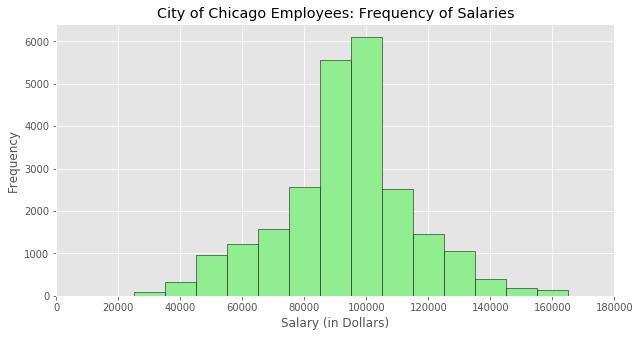

In [17]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Create bins array
bins = []
for i in range(18):
    bin = i * 10000
    bins.append(bin)
    
# Graph style
plot.style.use("ggplot")
plot.figure(figsize=(10,5))
plot.xlim([0,180000])

# Create title and lables
plot.title("City of Chicago Employees: Frequency of Salaries")
plot.xlabel("Salary (in Dollars)")
plot.ylabel("Frequency")

# Create histogram
plot.hist(salary_array, bins, align="left", color="lightgreen", edgecolor="black")
plot.show()

### Question: How many employees per department in the City of Chicago?

In [18]:
# Count the number of entries from each department
department_freq = salary_DF["Department"].value_counts()
department_freq

POLICE                 12537
FIRE                    4801
STREETS & SAN           2004
AVIATION                1887
WATER MGMNT             1826
TRANSPORTN              1091
PUBLIC LIBRARY          1018
DAIS                     966
OEMC                     864
HEALTH                   554
FAMILY & SUPPORT         552
FINANCE                  478
CITY COUNCIL             359
LAW                      331
PUBLIC SAFETY ADMIN      294
BUILDINGS                232
BUSINESS AFFAIRS         167
HOUSING & ECON DEV       152
COPA                     122
BOARD OF ELECTION        109
MAYOR'S OFFICE            99
INSPECTOR GEN             93
CITY CLERK                81
PROCUREMENT               78
HOUSING                   73
HUMAN RESOURCES           69
ANIMAL CONTRL             62
CULTURAL AFFAIRS          59
ADMIN HEARNG              35
BUDGET & MGMT             33
TREASURER                 27
DISABILITIES              21
HUMAN RELATIONS           15
BOARD OF ETHICS            8
POLICE BOARD  

**Your Answer:** *In the Police Department, there are 12537 employees. In the Fire Department, there are 4801 employees. In the Streets and Sanitary Department, there are 2004 employees. In the Aviation Department, there are 1887 employees. In the Water Management Department, there are 1826 employees. In the Transportation Department, there are 1091 employees. In the Public Library Department, there are 1018 employees. In the DAIS Department, there are 966 employees. In the OEMC Department, there are 864 employees. In the Health Department, there are 554 employees. In the Family & Support Department, there are 552 employees. In the Finance Department, there are 478 employees. In the City Council Department, there are 359 employees. In the Law Department, there are 331 employees. In the Public Safety Administration Department, there are 294 employees. In the Buildings Department, there are 232 employees. In the Business Affairs Department, there are 167 employees. In the Housing & Econ Developent Department, there are 152 employees. In the COPA Department, there are 122 employees. In the Board of Education Department, there are 109 employees. In the Mayor's Office Department, there are  employees  *

### Modify Data: Create a List of Departments and a List of Their Frequences

These two lists will be useful when plotting.

In [20]:
# Create department names list
department_names = department_freq.index.tolist()
# Create frequency list
department_counts = department_freq.tolist()
# Print
print(department_names)
print(department_counts)

['POLICE', 'FIRE', 'STREETS & SAN', 'AVIATION', 'WATER MGMNT', 'TRANSPORTN', 'PUBLIC LIBRARY', 'DAIS', 'OEMC', 'HEALTH', 'FAMILY & SUPPORT', 'FINANCE', 'CITY COUNCIL', 'LAW', 'PUBLIC SAFETY ADMIN', 'BUILDINGS', 'BUSINESS AFFAIRS', 'HOUSING & ECON DEV', 'COPA', 'BOARD OF ELECTION', "MAYOR'S OFFICE", 'INSPECTOR GEN', 'CITY CLERK', 'PROCUREMENT', 'HOUSING', 'HUMAN RESOURCES', 'ANIMAL CONTRL', 'CULTURAL AFFAIRS', 'ADMIN HEARNG', 'BUDGET & MGMT', 'TREASURER', 'DISABILITIES', 'HUMAN RELATIONS', 'BOARD OF ETHICS', 'POLICE BOARD', 'LICENSE APPL COMM']
[12537, 4801, 2004, 1887, 1826, 1091, 1018, 966, 864, 554, 552, 478, 359, 331, 294, 232, 167, 152, 122, 109, 99, 93, 81, 78, 73, 69, 62, 59, 35, 33, 27, 21, 15, 8, 2, 1]


### Visualization: Pie Chart of Employees by Department

Note: This pie chart has too many slices! We will need to fix it:

<function matplotlib.pyplot.show(*args, **kw)>

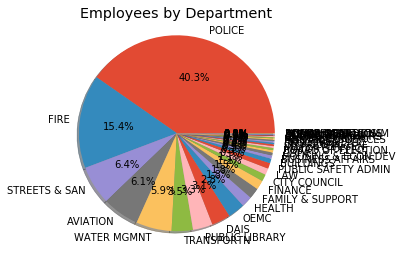

In [21]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Create labels and data array
labels = department_names
data = department_counts

# Graph pie chart
plot.pie(data, labels=labels, autopct="%1.1f%%", shadow=True)
plot.title("Employees by Department")
#plot.legend(title="Legend", loc="lower left")
plot.axis("equal")
plot.show

### Modify Data: If a Department is Not In the Top 10, Lump as 'Other'

In [24]:
# Make new list of largest 10 names, add "OTHER"
shortened_names = department_names[:10]
shortened_names.append("Other")
# Make new list of largets 10 counts, add sum of remaining
shortened_counts = department_counts[:10]
remaining = sum(department_counts[10:])
shortened_counts.append(remaining)
# Print two lists
print(shortened_names)
print(shortened_counts)

['POLICE', 'FIRE', 'STREETS & SAN', 'AVIATION', 'WATER MGMNT', 'TRANSPORTN', 'PUBLIC LIBRARY', 'DAIS', 'OEMC', 'HEALTH', 'Other']
[12537, 4801, 2004, 1887, 1826, 1091, 1018, 966, 864, 554, 3552]


### Visualization: Pie Chart of Number of Employees by Department (Fixed)

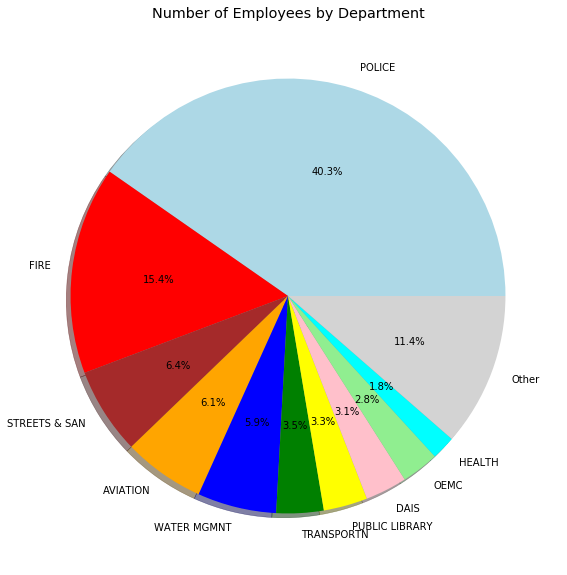

In [25]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.figure(figsize=(10,10))
plot.title("Number of Employees by Department")
plot.style.use("ggplot")
colors_array = ["lightblue", "red", "brown", "orange", "blue", "green", "yellow", "pink", "lightgreen", "cyan", "lightgray"]

# Create pie chart
    # plot.pie(data array, labels array, color array, percentages, shadow)
plot.pie(shortened_counts, labels=shortened_names, colors=colors_array, autopct="%1.1f%%", shadow=True)
#plot.legend(title="Legend), loc="lower_left")
plot.show()

### Question: What is the mean (average) salary in each department in the City of Chicago?

In [26]:
# Group each department
dept_salary_avg = salary_DF["Annual Salary"].groupby(salary_DF["Department"]).mean()
dept_salary_avg

Department
ADMIN HEARNG            82482.857143
ANIMAL CONTRL           78132.642857
AVIATION                84585.195353
BOARD OF ELECTION       55897.257248
BOARD OF ETHICS        106917.000000
BUDGET & MGMT          108248.903226
BUILDINGS              113061.142241
BUSINESS AFFAIRS        88845.931677
CITY CLERK              77996.555556
CITY COUNCIL            76741.653710
COPA                    89972.459016
CULTURAL AFFAIRS        92599.862069
DAIS                    99689.944687
DISABILITIES            97001.142857
FAMILY & SUPPORT        89862.755556
FINANCE                 80952.349776
FIRE                   106029.222179
HEALTH                  92518.573503
HOUSING                 92590.849315
HOUSING & ECON DEV      96211.360000
HUMAN RELATIONS        102528.800000
HUMAN RESOURCES         94613.043478
INSPECTOR GEN           90744.258065
LAW                    101934.624606
LICENSE APPL COMM      102732.000000
MAYOR'S OFFICE         107187.290323
OEMC                    787

**Your Answer:** *In the Admin Department, the average salary is 82482.86. In the Animal Control Department, the average salary is 78132.64. In the Police Department, the average salary is 101424.94.*

### Modify Data: Create a List of Departments and a List of Their Average Annual Salaries

These two lists will be useful when plotting.

In [29]:
# Array of department names sorted by the average salary
dept_names_avg = dept_salary_avg.index.tolist()
# Array of salaries sorted by department
dept_avg = dept_salary_avg.tolist()
# Print
print(dept_names_avg)
print(dept_avg)

['ADMIN HEARNG', 'ANIMAL CONTRL', 'AVIATION', 'BOARD OF ELECTION', 'BOARD OF ETHICS', 'BUDGET & MGMT', 'BUILDINGS', 'BUSINESS AFFAIRS', 'CITY CLERK', 'CITY COUNCIL', 'COPA', 'CULTURAL AFFAIRS', 'DAIS', 'DISABILITIES', 'FAMILY & SUPPORT', 'FINANCE', 'FIRE', 'HEALTH', 'HOUSING', 'HOUSING & ECON DEV', 'HUMAN RELATIONS', 'HUMAN RESOURCES', 'INSPECTOR GEN', 'LAW', 'LICENSE APPL COMM', "MAYOR'S OFFICE", 'OEMC', 'POLICE', 'POLICE BOARD', 'PROCUREMENT', 'PUBLIC LIBRARY', 'PUBLIC SAFETY ADMIN', 'STREETS & SAN', 'TRANSPORTN', 'TREASURER', 'WATER MGMNT']
[82482.85714285714, 78132.64285714286, 84585.19535294118, 55897.257247706424, 106917.0, 108248.90322580645, 113061.1422413793, 88845.93167701863, 77996.55555555556, 76741.65371024735, 89972.45901639345, 92599.86206896552, 99689.9446875, 97001.14285714286, 89862.75555555556, 80952.34977578475, 106029.22217871278, 92518.57350272233, 92590.8493150685, 96211.36, 102528.8, 94613.04347826086, 90744.25806451614, 101934.62460567824, 102732.0, 107187.2903

### Visualization: Bar Chart of Average Annual Salary by Department
#### Sorted by Departement Name

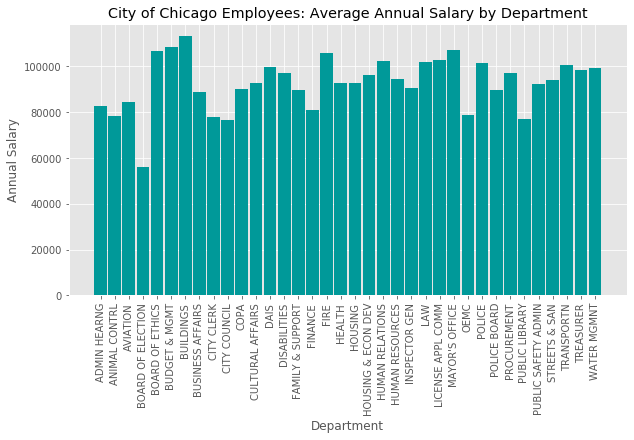

In [30]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.style.use("ggplot")
plot.figure(figsize=(10,5))
plot.title("City of Chicago Employees: Average Annual Salary by Department")
plot.xlabel("Department")
plot.ylabel("Annual Salary")

length = len(dept_names_avg)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, dept_names_avg, rotation=90)
width = 0.9

# Bar graph
plot.bar(bar_pos, dept_avg, width, color="#009999")
plot.show()

### Modify Data: Merge Our Two Lists Into a List of Tuples, Then Sort

By sorting, we can get a nicer plot.

In [32]:
# List of tuples in the form (names, average salary)
sorted_average_list = []
for i in range(len(dept_names_avg)):
    sorted_average_list.append((dept_names_avg[i], dept_avg[i]))
# Sort the list in reverse
sorted_average_list.sort(key = lambda x: x[1], reverse=True)
# Print
sorted_average_list

[('BUILDINGS', 113061.1422413793),
 ('BUDGET & MGMT', 108248.90322580645),
 ("MAYOR'S OFFICE", 107187.29032258065),
 ('BOARD OF ETHICS', 106917.0),
 ('FIRE', 106029.22217871278),
 ('LICENSE APPL COMM', 102732.0),
 ('HUMAN RELATIONS', 102528.8),
 ('LAW', 101934.62460567824),
 ('POLICE', 101424.9442816092),
 ('TRANSPORTN', 100408.37883656511),
 ('DAIS', 99689.9446875),
 ('WATER MGMNT', 99142.43659090907),
 ('TREASURER', 98541.66666666667),
 ('PROCUREMENT', 97265.84210526316),
 ('DISABILITIES', 97001.14285714286),
 ('HOUSING & ECON DEV', 96211.36),
 ('HUMAN RESOURCES', 94613.04347826086),
 ('STREETS & SAN', 94042.07829181495),
 ('CULTURAL AFFAIRS', 92599.86206896552),
 ('HOUSING', 92590.8493150685),
 ('HEALTH', 92518.57350272233),
 ('PUBLIC SAFETY ADMIN', 92158.84677966103),
 ('INSPECTOR GEN', 90744.25806451614),
 ('COPA', 89972.45901639345),
 ('FAMILY & SUPPORT', 89862.75555555556),
 ('POLICE BOARD', 89634.0),
 ('BUSINESS AFFAIRS', 88845.93167701863),
 ('AVIATION', 84585.19535294118),
 (

### Visualization: Another Bar Chart of Average Annual Salary by Department 

#### Sorted by Average Annual Salary

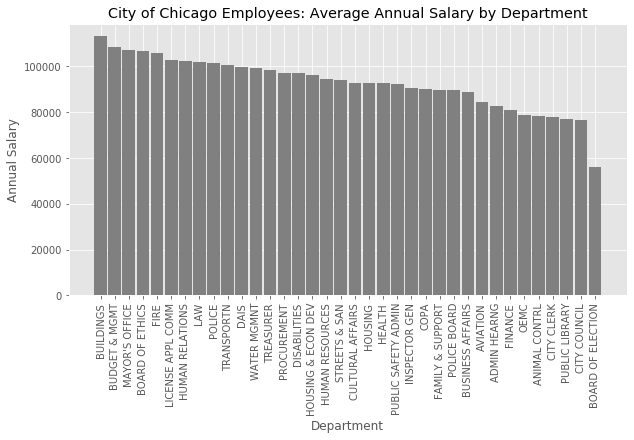

In [33]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('City of Chicago Employees: Average Annual Salary by Department')
plot.ylabel('Annual Salary')
plot.xlabel('Department')

# Create lists of sorted departements and total sums
x_data = [tuple[0] for tuple in sorted_average_list]
y_data = [tuple[1] for tuple in sorted_average_list]

length = len(sorted_average_list)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, x_data, rotation=90)
width = 0.9

plot.bar(bar_pos, y_data, width, color="gray")
plot.show()


**Task:** Explain what this code is doing: 
        
        x_data = [tuple[0] for tuple in sorted_average_list]

You can use this link as a resource for your explanation: 
https://www.pythonforbeginners.com/basics/list-comprehensions-in-python

**Your Answer:** *Write a complete sentence that addresses the question here.*

### Question: What is the total salary expenditure in each department in the City of Chicago?

In [35]:
# List of each departments total salary spending
dept_salary_sum = salary_DF["Annual Salary"].groupby(salary_DF["Department"]).sum()
dept_salary_sum

Department
ADMIN HEARNG           2.886900e+06
ANIMAL CONTRL          4.375428e+06
AVIATION               5.751793e+07
BOARD OF ELECTION      6.092801e+06
BOARD OF ETHICS        8.553360e+05
BUDGET & MGMT          3.355716e+06
BUILDINGS              2.623018e+07
BUSINESS AFFAIRS       1.430420e+07
CITY CLERK             6.317721e+06
CITY COUNCIL           2.171789e+07
COPA                   1.097664e+07
CULTURAL AFFAIRS       5.370792e+06
DAIS                   2.552063e+07
DISABILITIES           2.037024e+06
FAMILY & SUPPORT       2.426294e+07
FINANCE                3.610475e+07
FIRE                   5.090463e+08
HEALTH                 5.097773e+07
HOUSING                6.759132e+06
HOUSING & ECON DEV     1.443170e+07
HUMAN RELATIONS        1.537932e+06
HUMAN RESOURCES        6.528300e+06
INSPECTOR GEN          8.439216e+06
LAW                    3.231328e+07
LICENSE APPL COMM      1.027320e+05
MAYOR'S OFFICE         9.968418e+06
OEMC                   5.509648e+07
POLICE           

**Your Answer:** *Write a complete sentence that addresses the question here. It is okay to refer the reader to the table, since it might be time consuming to list out every department in the City of Chicago.*

### Modify Data: Create a Sorted List of Tuples

In [36]:
# List of department names
department_names_sum = dept_salary_sum.index.tolist()
# List of department total salary spending
department_sum = dept_salary_sum.tolist()
# Create list a tuples in form (department name, department total salary spending)
    # 'zip' binds two parallel arrays into tuples
sorted_sum_list = list(zip(department_names_sum, department_sum))
# Sort the list by total sums, in reverse
sorted_sum_list.sort(key = lambda x: x[1], reverse=True)
sorted_sum_list

[('POLICE', 1270651701.96),
 ('FIRE', 509046295.68000007),
 ('AVIATION', 57517932.84),
 ('OEMC', 55096479.720000006),
 ('PUBLIC LIBRARY', 54886680.0),
 ('HEALTH', 50977734.0),
 ('TRANSPORTN', 36247424.760000005),
 ('FINANCE', 36104748.0),
 ('WATER MGMNT', 34898137.67999999),
 ('LAW', 32313276.0),
 ('STREETS & SAN', 26425824.0),
 ('BUILDINGS', 26230185.0),
 ('DAIS', 25520625.84),
 ('FAMILY & SUPPORT', 24262944.0),
 ('PUBLIC SAFETY ADMIN', 21749487.840000004),
 ('CITY COUNCIL', 21717888.0),
 ('HOUSING & ECON DEV', 14431704.0),
 ('BUSINESS AFFAIRS', 14304195.0),
 ('COPA', 10976640.0),
 ("MAYOR'S OFFICE", 9968418.0),
 ('INSPECTOR GEN', 8439216.0),
 ('PROCUREMENT', 7392204.0),
 ('HOUSING', 6759132.0),
 ('HUMAN RESOURCES', 6528300.0),
 ('CITY CLERK', 6317721.0),
 ('BOARD OF ELECTION', 6092801.04),
 ('CULTURAL AFFAIRS', 5370792.0),
 ('ANIMAL CONTRL', 4375428.0),
 ('BUDGET & MGMT', 3355716.0),
 ('ADMIN HEARNG', 2886900.0),
 ('TREASURER', 2660625.0),
 ('DISABILITIES', 2037024.0),
 ('HUMAN RELAT

### Visualization: Bar Chart of Total Annual Salary Expenditure by Department 

#### Sorted by Total Expenditure
* y-axis expressed in billions of dollars (1 x 10^9 or 1e9)

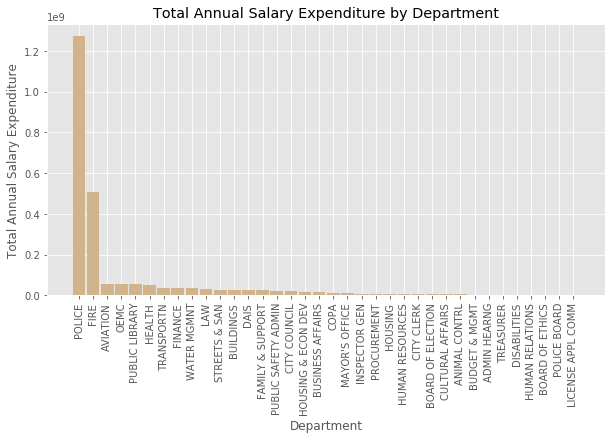

In [37]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('Total Annual Salary Expenditure by Department')
plot.ylabel('Total Annual Salary Expenditure')
plot.xlabel('Department')

# Create lists of sorted departements and total sums
x_data = [tuple[0] for tuple in sorted_sum_list]
y_data = [tuple[1] for tuple in sorted_sum_list]

length = len(sorted_sum_list)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, x_data, rotation=90)
width = 0.9

# Bar graph
plot.bar(bar_pos, y_data, width, color="tan")

plot.show()

# Open Data Example #2: School District Revenue and Enrollment

*Source for Data Set:* The United States Census Bureau (via data.gov)

*URL for Data Set:* https://www.census.gov/data/tables/2019/econ/school-finances/secondary-education-finance.html

*Note:* You should get this dataset from Schoology, not the URL. The Schoology file has been cleaned to remove outliers (for example, districts with 0 students or 0 revenue).

*Description of Data Set:* This data has school enrollment versus total revenue for every school district in the United States in 2015 (the most recent data available).

*File Format for Data Set:* CSV file (Comma Separated Values)

*Age of Data Set:* 10/8/2021, accessed 4/5/2022

Read in the data:

In [39]:
# Import pandas
import pandas as pd 
# Read the csv file (comma separated values)
enrollment_DF = pd.read_csv('Enrollment_Revenue_2019.csv')
# Print last three entries
enrollment_DF[-3:]

,NAME,Total Enrollment,Total Revenue
13265,ZUMBROTA-MAZEPPA SCH DISTRICT 2805,1204,17279
13266,ZUNI SCHOOL DISTRICT,1268,20295
13267,ZURICH ELEM DIST 17,21,391


Now plot:

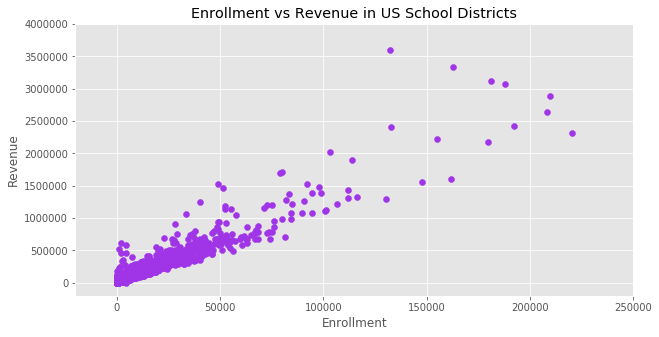

In [40]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

#enrollmentDF.plot(kind='scatter', x='Enrollment', y='Total Revenue');

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('Enrollment vs Revenue in US School Districts')
plot.ylabel('Revenue')
plot.xlabel('Enrollment')

x_data = enrollment_DF["Total Enrollment"]
y_data = enrollment_DF["Total Revenue"]
plot.xlim([-20000,250000])
plot.ylim([-200000,4000000])

# Scatter plot
plot.scatter(x_data, y_data, color="#A035E8")


plot.show()

### Question: What seems to be the relationship between the number of students enrolled in a school district and the revenue of the district?

### Linear Regression
* Modeling the relationship between two variables using a linear equation (straight line)
* Equation for a line in slope-intercept form:
    * y = mx + b
        * m = slope
        * b = y-intercept

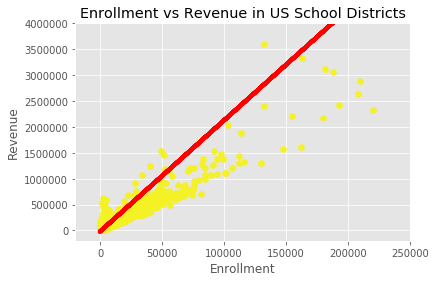

In [41]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.title('Enrollment vs Revenue in US School Districts')
plot.ylabel('Revenue')
plot.xlabel('Enrollment')

x_data = enrollment_DF["Total Enrollment"]
y_data = enrollment_DF["Total Revenue"]
plot.xlim([-20000,250000])
plot.ylim([-200000,4000000])

# Use np.polyfit to calculate the slope and y-intercept for the 'line of best fit'
m, b = np.polyfit(x_data, y_data, 1)

# Scatter Plot
    # plot.plot(variable, equation, line width, color)
plot.plot(x_data, m*x_data + b, linewidth=4, color="red")
plot.scatter(x_data, y_data, color="#F4F124")

plot.show()

**Your Answer:** *Write a complete sentence that addresses the question here. You might refer to what you see in the plot above.*

### Question: Explain the meaning of the code in the cell below. Then run it and interpret the resulting output.

In [42]:
x0 = 125000
print(m*x0 + b)

2663096.67618859


**Your Answer:** *Write a complete sentence that addresses the question here.*